## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [4]:
df=pd.read_csv("ufo_sightings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64683 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    64683 non-null  int64  
 1   Date_Time            64683 non-null  object 
 2   City                 64683 non-null  object 
 3   State/Province       59973 non-null  object 
 4   Country              56927 non-null  object 
 5   UFO_Shape            63124 non-null  object 
 6   Length_of_Encounter  64683 non-null  float64
 7   Described_Duration   64683 non-null  object 
 8   Description          64668 non-null  object 
 9   Date_Documented      64683 non-null  object 
 10  Latitude             64683 non-null  float64
 11  Longitude            64683 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.9+ MB


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [5]:
nonnull_df=df.dropna()
nonnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    53562 non-null  int64  
 1   Date_Time            53562 non-null  object 
 2   City                 53562 non-null  object 
 3   State/Province       53562 non-null  object 
 4   Country              53562 non-null  object 
 5   UFO_Shape            53562 non-null  object 
 6   Length_of_Encounter  53562 non-null  float64
 7   Described_Duration   53562 non-null  object 
 8   Description          53562 non-null  object 
 9   Date_Documented      53562 non-null  object 
 10  Latitude             53562 non-null  float64
 11  Longitude            53562 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.3+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [20]:
nonnull_df=nonnull_df.drop("Date_Documented", axis=1)
nonnull_df.head()

,#,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
0,0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [21]:
nonnull_df["Date_Time"]=pd.to_datetime(df["Date_Time"])
nonnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 64682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   #                    53562 non-null  int64         
 1   Date_Time            53562 non-null  datetime64[ns]
 2   City                 53562 non-null  object        
 3   State/Province       53562 non-null  object        
 4   Country              53562 non-null  object        
 5   UFO_Shape            53562 non-null  object        
 6   Length_of_Encounter  53562 non-null  float64       
 7   Latitude             53562 non-null  float64       
 8   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.1+ MB


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

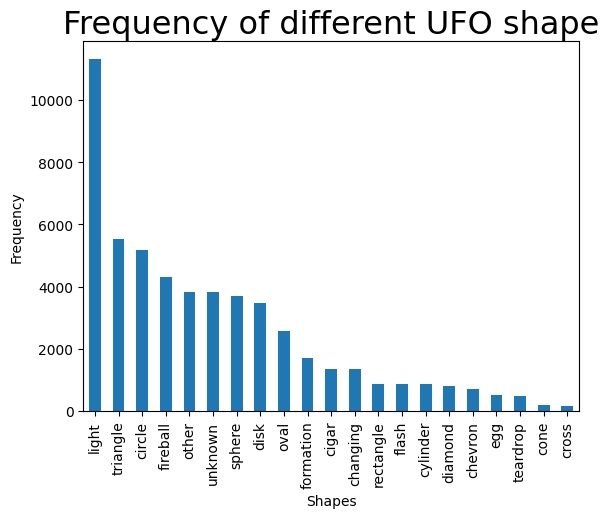

In [27]:
item_value_counts=nonnull_df["UFO_Shape"].value_counts()
#item_value_counts
item_value_counts.plot.bar()
plt.title("Frequency of different UFO shape",fontsize=23);
plt.xlabel("Shapes")
plt.ylabel("Frequency");

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

Text(0, 0.5, 'Encounters')

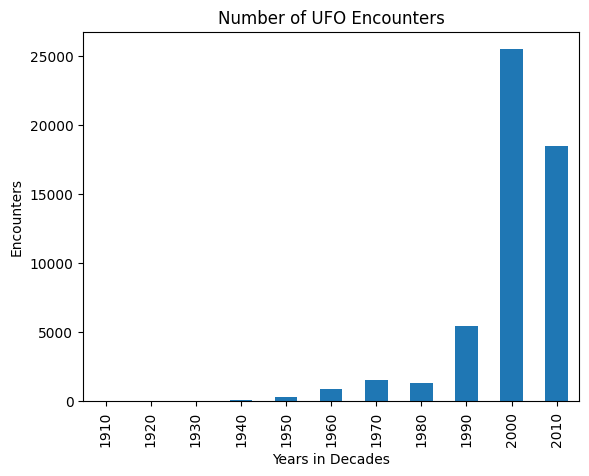

In [42]:
#nonnull_df["Year"]=nonnull_df["Date_Time"].dt.year
#nonnull_df.head()
#nonnull_df["Decades"]=(nonnull_df["Year"] // 10) * 10
#nonnull_df.head()
nonnull_df["Decades"].value_counts().sort_index().plot.bar()
plt.title("Number of UFO Encounters")
plt.xlabel("Years in Decades")
plt.ylabel("Encounters")


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

In [5]:
# nonnull_df["Hours"]=nonnull_df.Date_Time.dt.hour

item_value_counts=nonnull_df["Hours"].value_counts()

item_value_counts.plot.line(x="Hours",y="#")
nonnull_df.plot.line(x="Hours", y="")
# nonnull_df['Hours'] = nonnull_df['Date_Time'].dt.hour
# sightings_by_hour = nonnull_df['Hours'].value_counts().sort_index()
# sightings_by_hour.plot.line(x='Hours');
# plt.title('Number of Sightings by Hour');
# plt.xlabel('Hou of the Day');
# plt.ylabel('Number of sightings');
# plt.xticks(sightings_by_hour.index);

NameError: name 'nonnull_df' is not defined

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Q1 Answer 
    Light

2. Which shape is least frequently reported?
    * Q2 Answer
    Cross

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * Q3 Answer

4. Are there other factors that may account for this pattern in the data?
    * Q4 Answer

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * Q5 Answer
    That in the 2000's there are alot of sightings. It could be that cell phones are more common place so people are more likely to believe you if you have proof.

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * Q6 Answer


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart